# Ford GoBike System Data

## Investigation Overview
In this investigation, I thinks the duration, day and hour of the trip  are importent for comparing with other factors like gender,age and user type.

## Dataset Overview
This data set include information abot bick system. There are some varibles like (duration_sec,user_type ,member_gender )

# Installing Packages

In [23]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import datetime

%matplotlib inline

# Data Gathering

In [24]:
# load the dataset 
ford = pd.read_csv('fordgobike_tripdata.csv')


In [25]:
# make a copy of the datasets
ford_clean = ford.copy()

In [26]:
# Change the datatype of some columns

ford_clean['start_time'] = pd.to_datetime(ford_clean.start_time, format="%Y-%m-%d %H:%M:%S")
ford_clean['end_time'] = pd.to_datetime(ford_clean.end_time, format="%Y-%m-%d %H:%M:%S")
 
ford_clean['bike_id'] = ford_clean['bike_id'].astype(object)

In [27]:
#Convert the member_birth_year to int
ford_clean['member_birth_year'] = pd.to_numeric(ford_clean['member_birth_year'], errors='coerce')
ford_clean = ford_clean.dropna(subset=['member_birth_year'])
ford_clean['member_birth_year'] = ford_clean['member_birth_year'].astype(int)

In [28]:
#Convert the start_station_id and end_station_id to int

ford_clean['end_station_id'] = pd.to_numeric(ford_clean['end_station_id'], errors='coerce')
ford_clean = ford_clean.dropna(subset=['end_station_id'])
ford_clean['end_station_id'] = ford_clean['end_station_id'].astype(int)


In [29]:
#Convert the start_station_id to int
ford_clean['start_station_id'] = pd.to_numeric(ford_clean['start_station_id'], errors='coerce')
ford_clean = ford_clean.dropna(subset=['start_station_id'])
ford_clean['start_station_id'] = ford_clean['start_station_id'].astype(int)

In [30]:
#create new columns (trip_year,trip_month,trip_day,trip_hour)
ford_clean['trip_year'] = ford_clean.start_time.dt.strftime('%y')
ford_clean['trip_month'] = ford_clean.start_time.dt.strftime('%b')
ford_clean['trip_day'] = ford_clean.start_time.dt.strftime('%a')
ford_clean['trip_hour'] = ford_clean.start_time.dt.strftime('%H')

In [31]:
ford_clean['visit_yr'] = ford_clean.groupby(['bike_id', 'trip_year']).cumcount()+1


In [32]:
#create new column (age)
ford_clean['age'] = datetime.now().year - ford_clean.member_birth_year


In [33]:
# drop unncecessary columns no  need for them in analysis 
ford_clean = ford_clean.drop(['member_birth_year','start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude','start_time', 'end_time','bike_share_for_all_trip'], axis=1)

In [34]:
#drop age outlire (142 and 110)
ford_clean.drop(ford_clean[ford_clean.age >100].index, inplace = True)

In [35]:
# Change the datatype of some columns to category type

ford_clean.trip_year = ford_clean.trip_year.astype('category')

ford_clean.trip_month = ford_clean.trip_month.astype('category')
ford_clean.trip_day = ford_clean.trip_day.astype('category')
ford_clean['duration_min'] = ford_clean['duration_sec'] / 60


In [36]:
 #drop null values in gender column
ford_clean.dropna(inplace=True)
ford_clean[ford_clean.member_gender.isnull()]
ford_clean.member_gender.unique()

array(['Male', 'Other', 'Female'], dtype=object)

In [37]:
 #drop null values
ford_clean.dropna(inplace=True)
ford_clean[ford_clean.age.isnull()]
ford_clean.age.unique()

array([37, 49, 32, 47, 62, 38, 33, 29, 25, 28, 31, 40, 46, 43, 30, 24, 35,
       21, 39, 26, 41, 48, 36, 50, 42, 54, 23, 27, 44, 22, 34, 52, 58, 45,
       57, 56, 60, 53, 55, 59, 67, 63, 61, 51, 65, 64, 76, 69, 73, 70, 80,
       71, 72, 68, 66, 75, 74, 90, 78, 79, 88, 20, 77, 93, 87, 82, 91, 83,
       94])

In [38]:
# add acolumn for age_classifier
def age_classifier(age):
    if age >= 0 and age <18:
        return "Kids"
    elif age >= 18 and age < 37:
        return "Adults"
    elif age >= 37 and age < 55:
        return "Matures"
    else:
        return "Elders"

ford_clean["age_group"] = ford_clean["age"].apply(age_classifier)

In [39]:
# convert some columns into ordered categorical types
ordinal_var_dict = {'member_gender': ['Male','Other','Female']
                    ,'age_group':[ 'Kids','Adults','Matures','Elders']
                    ,'user_type':['Subscriber','Customer']
                   }

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    ford_clean[var] = ford_clean[var].astype(ordered_var)

## Distribution of Trip Duration
Most of the  duration values of trips are 1000 seconds .The pack of value is around 500 sec. 

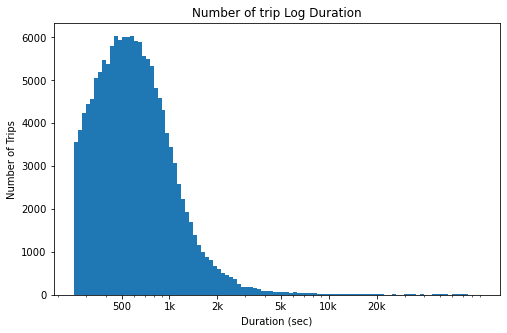

In [40]:
# there's a long tail in the distribution, so let's put it on a log scale instead
log_binsize = 0.025
bins = 10 ** np.arange(2.4, np.log10(ford_clean['duration_sec'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = ford_clean, x = 'duration_sec', bins = bins)
plt.xscale('log')
plt.xticks([500, 1e3, 2e3, 5e3, 1e4, 2e4], [500, '1k', '2k', '5k', '10k', '20k'])
plt.ylabel('Number of Trips')
plt.xlabel('Duration (sec)')
plt.title('Number of trip Log Duration')
plt.show();

## Distribution of Day_trip
weekdays have way more trips than the weekends,I think the trip using for work Transportation.

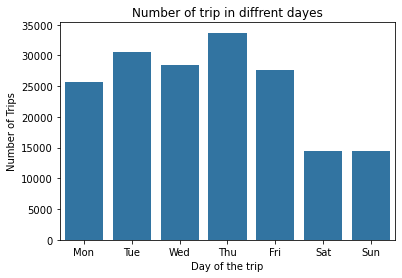

In [41]:
cat_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

sb.countplot(data=ford_clean, x='trip_day',order = cat_order, color=sb.color_palette()[0]);
plt.xlabel('Day of the trip')
plt.ylabel('Number of Trips')
plt.title('Number of trip in diffrent dayes');

## Distribution of User type
Most of the users are subscriber, I think the trip price depend on the user type.If the user is subscriber you will buy less than customer.

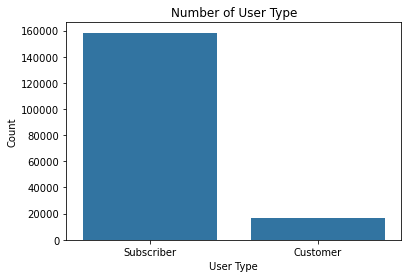

In [42]:
sb.countplot(data=ford_clean, x='user_type', color=sb.color_palette()[0]);
plt.xlabel('User Type');
plt.ylabel('Count');
plt.title('Number of User Type');

## Distribution of Gender
Most of the users are Male.I thinke most of worker are Male. 

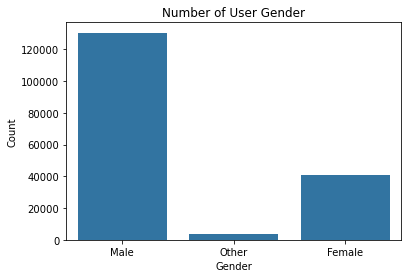

In [43]:
sb.countplot(data=ford_clean, x='member_gender', color=sb.color_palette()[0]);
plt.xlabel('Gender');
plt.ylabel('Count');
plt.title('Number of User Gender');


## User type vs. Duration 
The trip duration distribution is narrower for customer than subscriber.It provide that the subscribers use the bikes more usually.

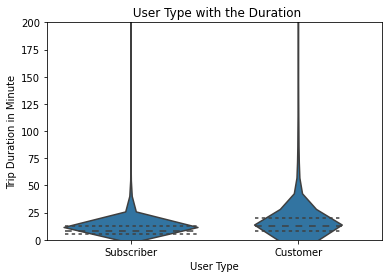

In [44]:
# Change duration from second to minutes 

ford_clean['duration_min'] = ford_clean['duration_sec'] / 60
plt.ylim([0,200])
sb.violinplot(data=ford_clean, x='user_type', y='duration_min', color=sb.color_palette()[0], inner='quartile');
plt.xlabel('User Type');
plt.ylabel('Trip Duration in Minute');
plt.title(' User Type with the Duration');

## Trip duration vs. Gender  
Male have long trip duration

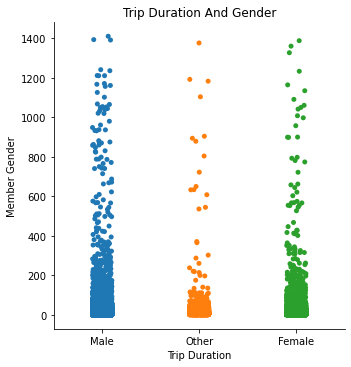

In [45]:

sb.catplot(x="member_gender", y="duration_min", data=ford_clean)
plt.xlabel('Trip Duration')
plt.ylabel('Member Gender');

plt.title('Trip Duration And Gender');


## Trip day vs. Duration  
Trip duration in weekend is higher than week day , most of the user take overtime in thier work.

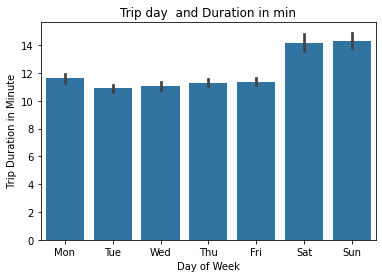

In [46]:

cat_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']


sb.barplot(data=ford_clean, x='trip_day', y='duration_min', order = cat_order,color=sb.color_palette()[0]);
plt.xlabel('Day of Week');
plt.ylabel(' Trip Duration in Minute');
plt.title('Trip day  and Duration in min');

## User type vs Gender
Most of the users are subscriber and male.

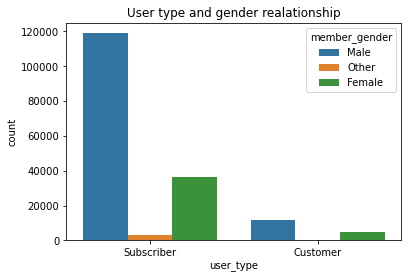

In [47]:
sb.countplot(data=ford_clean, x='user_type', hue='member_gender')
plt.title('User type and gender realationship');

## Trip Duration and  trip day vs member gender
The other spend more time per trip more than the males and female in all day. 


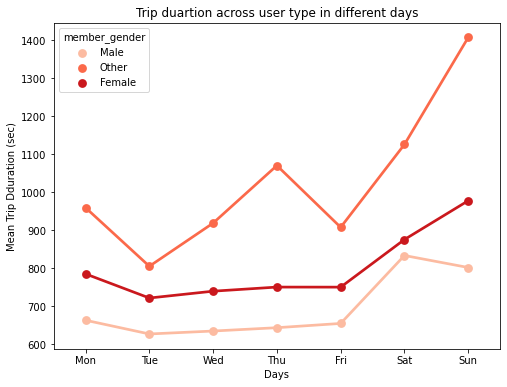

In [48]:
fig = plt.figure(figsize = [8,6])
cat_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

sb.pointplot(data = ford_clean, x = 'trip_day', y = 'duration_sec', order = cat_order,hue = 'member_gender', palette = 'Reds', ci=None)
plt.title('Trip duartion across user type in different days')
plt.ylabel('Mean Trip Dduration (sec)')
plt.xlabel('Days')
plt.show();

## User type and member gender with trip day
Subscribers mostaly use bick on weekday espicily in  thursday for all gender but in weekend they rarely useing bick.

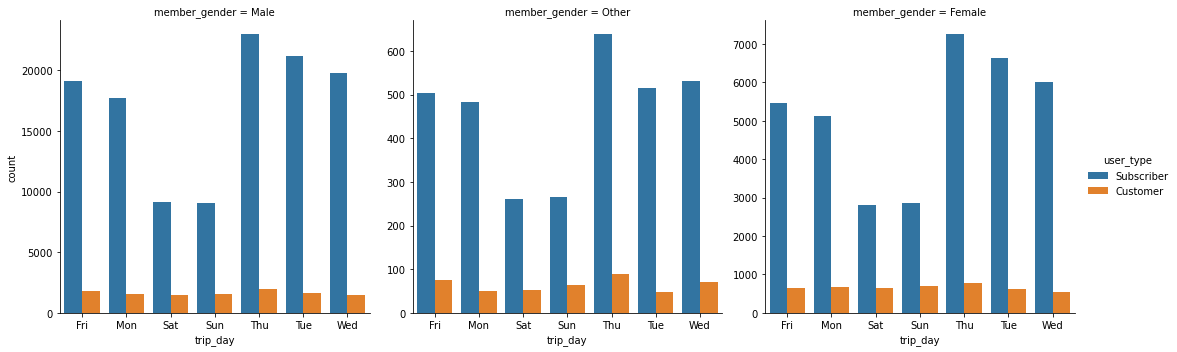

In [49]:
sb.catplot(data=ford_clean, x='trip_day', col='member_gender',hue='user_type',kind='count', sharey=False);

In [51]:
!jupyter nbconvert *.ipynb --to slides --post serve

[NbConvertApp] Converting notebook exploratory-Copy1.ipynb to slides
[NbConvertApp] Writing 489609 bytes to exploratory-Copy1.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\alasl\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\alasl\anaconda3\lib\site-packages\jupyter_core\application.py", line 270, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\alasl\anaconda3\lib\site-packages\traitlets\config\application.py", line 664, in launch_instance
    app.start()
  File "C:\Users\alasl\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 340, in start
    self.convert_notebooks()
  File "C:\Users\alasl\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 510, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  File "C: